In [1]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

def plot_train_progress_1(loss_train, loss_test, iters_per_point, total_iters=None):

    fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
    x_points = range(0, len(loss_train)*iters_per_point, iters_per_point)
    
    axes.plot(x_points, loss_train, color="red", label="Training loss", linewidth=1)
    axes.plot(x_points, loss_test, color="blue", label="Test loss", linewidth=1)
    axes.set_title("Training loss", fontsize=10, y=1.022)
    axes.yaxis.grid(True, zorder=0)
    axes.set_xlabel('Iteration', fontsize=10)
    if total_iters is not None:
        axes.set_xlim([0,total_iters])
    axes.set_ylim([0,None])
    axes.legend(loc='upper right')
    plt.show()

def plot_metrics(loss_test, iters_per_point, loss_type, total_iters=None):

    fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
    x_points = range(0, len(loss_test)*iters_per_point, iters_per_point)
    
    axes.plot(x_points, loss_test, color="blue", label=loss_type + " on test set", linewidth=1)
    axes.set_title(loss_type, fontsize=10, y=1.022)
    axes.yaxis.grid(True, zorder=0)
    axes.set_xlabel('Iteration', fontsize=10)
    if total_iters is not None:
        axes.set_xlim([0,total_iters])
    axes.set_ylim([0,None])
    axes.legend(loc='upper right')
    plt.show()

def get_random_batch(train_features, train_lbls, batch_size, rng):
    indices = range(0, batch_size)  # Remove this line after you fill-in and un-comment the below. 
    indices = rng.randint(low=0, high=train_features.shape[0], size=batch_size, dtype='int32')
    ##############################################################################################
    
    train_features_batch = train_features[indices]
    if train_lbls is not None:
        train_lbls_batch = train_lbls[indices]
    else:
        train_lbls_batch = None
    return [train_features_batch, train_lbls_batch]

def training_network(net,
                    loss_func,
                    rng,
                    train_inputs_all,
                    train_labels_all,
                    test_values_all,
                    test_labels_all,
                    batch_size,
                    learning_rate,
                    total_iters,
                    iters_per_recon_plot=-1):
    # net: Instance of a model. See classes: Autoencoder, MLPClassifier, etc further below
    # loss_func: Function that computes the loss. See functions: reconstruction_loss or cross_entropy.
    # rng: numpy random number generator
    # train_imgs_all: All the training images. Numpy array, shape [N_tr, H, W]
    # batch_size: Size of the batch that should be processed per SGD iteration by a model.
    # learning_rate: self explanatory.
    # total_iters: how many SGD iterations to perform.
    loss_values_to_plot = []
    values_to_plot = {'loss_train':[], 'loss_test': []}
    MSE_plot = []
    MAE_plot = []
    min_test_loss = 1
    min_test_loss_iter = 0
    
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)  # Will use PyTorch's Adam optimizer out of the box
        
    for t in range(total_iters):
        # Sample batch for this SGD iteration
        x_imgs, x_targets = get_random_batch(train_inputs_all, train_labels_all, batch_size, rng)

        # Forward pass
        x_pred = net.forward_pass(x_imgs)

        # Compute loss:
        loss = loss_func(x_pred, x_targets)
        
        # Pytorch way
        optimizer.zero_grad()
        gradient = net.backward_pass(loss)
        optimizer.step()
        
        # ==== Report training loss and accuracy ======
        loss_np = loss if type(loss) is type(float) else loss.item()  # Pytorch returns tensor. Cast to float
        if(t % 25000 == 0):
            print("[iter:", t, "]: Training Loss: {0:.4f}".format(loss))
        #if(t % 1000000 == 0):
            #print(f"Gradient is {gradient}")
        if(t % iters_per_recon_plot == 0):
            x_test_pred = net.forward_pass(test_values_all)
            loss = loss_func(x_test_pred, test_labels_all)
            loss_test = loss if type(loss) is type(float) else loss.item()
            if(loss_test < min_test_loss):
                min_test_loss = loss_test
                min_test_loss_iter = t
            values_to_plot['loss_train'].append(loss_np)
            values_to_plot['loss_test'].append(loss_test)

            MAE_plot.append(MAE_loss(x_test_pred, test_labels_all))
            MSE_plot.append(MSE_loss(x_test_pred, test_labels_all))
            
    print(f"Min Test Loss: {min_test_loss} at {min_test_loss_iter}")
    plot_train_progress_1(values_to_plot['loss_train'], values_to_plot['loss_test'], iters_per_point=1)
    plot_metrics(MAE_plot, iters_per_point=1, loss_type='MAE')
    plot_metrics(MSE_plot, iters_per_point=1, loss_type='MSE')

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
class Seven_layer_network(nn.Module):
    def __init__(self, rng, D_in, D_hid_1, D_hid_2, D_hid_3, D_hid_4, D_hid_5):
        super(Seven_layer_network, self).__init__()
        # Construct and initialize network parameters
        D_in = D_in # Dimension of input features
        D_out = 2 # Dimension of Output layer.
        self.layer_1 = nn.Linear(D_in+1, D_hid_1)
        self.bn1 = nn.BatchNorm1d(D_hid_1)
        self.layer_2 = nn.Linear(D_hid_1+1, D_hid_2)
        self.bn2 = nn.BatchNorm1d(D_hid_2)
        self.layer_3 = nn.Linear(D_hid_2+1, D_hid_3)
        self.bn3 = nn.BatchNorm1d(D_hid_3)
        self.layer_4 = nn.Linear(D_hid_3+1, D_hid_4)
        self.bn4 = nn.BatchNorm1d(D_hid_4)
        self.layer_5 = nn.Linear(D_hid_4+1, D_hid_5)
        self.bn5 = nn.BatchNorm1d(D_hid_5)
        self.layer_6 = nn.Linear(D_hid_5+1, D_out)
        
        #self.loss_function = MSE_loss()
        ###########################################################################
    
    def backward_pass(self, loss):
        # Performs back propagation and computes gradients
        # With PyTorch, we do not need to compute gradients analytically for parameters were requires_grads=True, 
        # Calling loss.backward(), torch's Autograd automatically computes grads of loss wrt each parameter p,...
        # ... and **puts them in p.grad**. Return them in a list.
        loss.backward()
        grads = [param.grad for param in self.parameters()]
        return grads
        
    def forward_pass(self, batch_inputs):
        
        batch_inputs_t = torch.tensor(batch_inputs, dtype=torch.float)  # Makes pytorch array to pytorch tensor.
        
        unary_feature_for_bias = torch.ones(size=(batch_inputs.shape[0], 1)) # [N, 1] column vector.
        x = torch.cat((batch_inputs_t, unary_feature_for_bias), dim=1) # Extra feature=1 for bias.
    
        # Layer 1
        h1_preact = self.layer_1(x)
        h1_act = h1_preact.clamp(min=0)
        h1_act = self.bn1(h1_act)
        # Layer 2:
        h1_ext = torch.cat((h1_act, unary_feature_for_bias), dim=1)
        h2_preact = self.layer_2(h1_ext)
        h2_act = h2_preact.clamp(min=0)
        h2_act = self.bn2(h2_act)
        # Layer 3:
        h2_ext = torch.cat((h2_act, unary_feature_for_bias), dim=1)
        h3_preact = self.layer_3(h2_ext)
        h3_act = h3_preact.clamp(min=0)
        h3_act = self.bn3(h3_act)
        # Layer 4:
        h3_ext = torch.cat((h3_act, unary_feature_for_bias), dim=1)
        h4_preact = self.layer_4(h3_ext)
        h4_act = h4_preact.clamp(min=0)
        h4_act = self.bn4(h4_act)

        h4_ext = torch.cat((h4_act, unary_feature_for_bias), dim=1)
        h5_preact = self.layer_5(h4_ext)
        h5_act = h5_preact.clamp(min=0)
        h5_act = self.bn5(h5_act)

        h5_ext = torch.cat((h5_act, unary_feature_for_bias), dim=1)
        h6_preact = self.layer_6(h5_ext)#
        h6_act = h6_preact
        x_pred = h6_act
                
        return x_pred
        
        
def Magnitude_loss(x_pred, x_real, eps=1e-7):
    # Cross entropy: See Lecture 5, slide 19.
    # x_pred: [N, D_out] Prediction returned by forward_pass. Numpy array of shape [N, D_out]
    # x_real: [N, D_in]
    
    # If number array is given, change it to a Torch tensor.
    x_pred = torch.tensor(x_pred, dtype=torch.float) if type(x_pred) is np.ndarray else x_pred
    x_real = torch.tensor(x_real, dtype=torch.float) if type(x_real) is np.ndarray else x_real

    loss_recon = torch.sqrt(torch.sum(torch.square((x_pred - x_real)), axis= 1))
    cost = torch.mean(loss_recon)
    return cost

def MSE_loss(x_pred, x_real):
    mse = torch.mean(torch.square(x_pred - torch.tensor(x_real)))
    with torch.no_grad():
        return mse.numpy()

def MAE_loss(x_pred, x_real):
    mae = torch.mean(abs(x_pred - torch.tensor(x_real)))
    with torch.no_grad():
        return mae.numpy()

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
class Five_layer_network(nn.Module):
    def __init__(self, rng, D_in, D_hid_1, D_hid_2, D_hid_3):
        super(Five_layer_network, self).__init__()
        # Construct and initialize network parameters
        D_in = D_in # Dimension of input features
        D_out = 2 # Dimension of Output layer.
        self.layer_1 = nn.Linear(D_in+1, D_hid_1)
        self.bn1 = nn.BatchNorm1d(D_hid_1)
        self.layer_2 = nn.Linear(D_hid_1+1, D_hid_2)
        self.bn2 = nn.BatchNorm1d(D_hid_2)
        self.layer_3 = nn.Linear(D_hid_2+1, D_hid_3)
        self.bn3 = nn.BatchNorm1d(D_hid_3)
        self.layer_4 = nn.Linear(D_hid_3+1, D_out)
        
        ###########################################################################
    
    def backward_pass(self, loss):
        # Performs back propagation and computes gradients
        # With PyTorch, we do not need to compute gradients analytically for parameters were requires_grads=True, 
        # Calling loss.backward(), torch's Autograd automatically computes grads of loss wrt each parameter p,...
        # ... and **puts them in p.grad**. Return them in a list.
        loss.backward()
        grads = [param.grad for param in self.parameters()]
        return grads
        
    def forward_pass(self, batch_inputs):
        
        batch_inputs_t = torch.tensor(batch_inputs, dtype=torch.float)  # Makes pytorch array to pytorch tensor.
        
        unary_feature_for_bias = torch.ones(size=(batch_inputs.shape[0], 1)) # [N, 1] column vector.
        x = torch.cat((batch_inputs_t, unary_feature_for_bias), dim=1) # Extra feature=1 for bias.
    
        # Layer 1
        h1_preact = self.layer_1(x) #.mm(w1)
        h1_act = h1_preact.clamp(min=0)
        h1_act = self.bn1(h1_act)
        # Layer 2:
        h1_ext = torch.cat((h1_act, unary_feature_for_bias), dim=1)
        h2_preact = self.layer_2(h1_ext)
        h2_act = h2_preact.clamp(min=0)
        h2_act = self.bn2(h2_act)
        # Layer 3:
        h2_ext = torch.cat((h2_act, unary_feature_for_bias), dim=1)
        h3_preact = self.layer_3(h2_ext)
        h3_act = h3_preact.clamp(min=0)
        h3_act = self.bn3(h3_act)
        # Layer 4:
        # Output layer
        h3_ext = torch.cat((h3_act, unary_feature_for_bias), dim=1)
        h4_preact = self.layer_4(h3_ext)
        h4_act = h4_preact
        x_pred = h4_act
                
        return x_pred
        
        
def Magnitude_loss(x_pred, x_real, eps=1e-7):
    # Cross entropy: See Lecture 5, slide 19.
    # x_pred: [N, D_out] Prediction returned by forward_pass. Numpy array of shape [N, D_out]
    # x_real: [N, D_in]
    
    # If number array is given, change it to a Torch tensor.
    x_pred = torch.tensor(x_pred, dtype=torch.float) if type(x_pred) is np.ndarray else x_pred
    x_real = torch.tensor(x_real, dtype=torch.float) if type(x_real) is np.ndarray else x_real

    loss_recon = torch.sqrt(torch.sum(torch.square((x_pred - x_real)), axis= 1))
    cost = torch.mean(loss_recon) # Expectation of loss: Mean over samples (axis=0).
    return cost

def MSE_loss(x_pred, x_real):
    mse = torch.mean(torch.square(x_pred - torch.tensor(x_real)))
    with torch.no_grad():
        return mse.numpy()

def MAE_loss(x_pred, x_real):
    mae = torch.mean(abs(x_pred - torch.tensor(x_real)))
    with torch.no_grad():
        return mae.numpy()

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
class Seven_no_batch_layer_network(nn.Module):
    def __init__(self, rng, D_in, D_hid_1, D_hid_2, D_hid_3, D_hid_4, D_hid_5):
        super(Seven_no_batch_layer_network, self).__init__()
        # Construct and initialize network parameters
        D_in = D_in # Dimension of input features
        D_out = 2 # Dimension of Output layer.
        self.layer_1 = nn.Linear(D_in+1, D_hid_1)
        self.layer_2 = nn.Linear(D_hid_1+1, D_hid_2)
        self.layer_3 = nn.Linear(D_hid_2+1, D_hid_3)
        self.layer_4 = nn.Linear(D_hid_3+1, D_hid_4)
        self.layer_5 = nn.Linear(D_hid_4+1, D_hid_5)
        self.layer_6 = nn.Linear(D_hid_5+1, D_out)
        
        #self.loss_function = MSE_loss()
        ###########################################################################
    
    def backward_pass(self, loss):
        # Performs back propagation and computes gradients
        # With PyTorch, we do not need to compute gradients analytically for parameters were requires_grads=True, 
        # Calling loss.backward(), torch's Autograd automatically computes grads of loss wrt each parameter p,...
        # ... and **puts them in p.grad**. Return them in a list.
        loss.backward()
        grads = [param.grad for param in self.parameters()]
        return grads
        
    def forward_pass(self, batch_inputs):
        
        batch_inputs_t = torch.tensor(batch_inputs, dtype=torch.float)  # Makes pytorch array to pytorch tensor.
        
        unary_feature_for_bias = torch.ones(size=(batch_inputs.shape[0], 1)) # [N, 1] column vector.
        x = torch.cat((batch_inputs_t, unary_feature_for_bias), dim=1) # Extra feature=1 for bias.
    
        # Layer 1
        h1_preact = self.layer_1(x) #.mm(w1)
        h1_act = h1_preact.clamp(min=0)
        # Layer 2 (bottleneck):
        h1_ext = torch.cat((h1_act, unary_feature_for_bias), dim=1)
        h2_preact = self.layer_2(h1_ext)
        h2_act = h2_preact.clamp(min=0)
        # Layer 3:
        h2_ext = torch.cat((h2_act, unary_feature_for_bias), dim=1)
        h3_preact = self.layer_3(h2_ext)
        h3_act = h3_preact.clamp(min=0)
        # Layer 4:
        h3_ext = torch.cat((h3_act, unary_feature_for_bias), dim=1)
        h4_preact = self.layer_4(h3_ext)
        h4_act = h4_preact.clamp(min=0)

        h4_ext = torch.cat((h4_act, unary_feature_for_bias), dim=1)
        h5_preact = self.layer_5(h4_ext)
        h5_act = h5_preact.clamp(min=0)

        h5_ext = torch.cat((h5_act, unary_feature_for_bias), dim=1)
        h6_preact = self.layer_6(h5_ext)#
        h6_act = h6_preact
        x_pred = h6_act

        return x_pred
        
        
def Magnitude_loss(x_pred, x_real, eps=1e-7):
    # Cross entropy: See Lecture 5, slide 19.
    # x_pred: [N, D_out] Prediction returned by forward_pass. Numpy array of shape [N, D_out]
    # x_real: [N, D_in]
    
    # If number array is given, change it to a Torch tensor.
    x_pred = torch.tensor(x_pred, dtype=torch.float) if type(x_pred) is np.ndarray else x_pred
    x_real = torch.tensor(x_real, dtype=torch.float) if type(x_real) is np.ndarray else x_real

    loss_recon = torch.sqrt(torch.sum(torch.square((x_pred - x_real)), axis= 1))
    cost = torch.mean(loss_recon) # Expectation of loss: Mean over samples (axis=0).
    return cost

def MSE_loss(x_pred, x_real):
    mse = torch.mean(torch.square(x_pred - torch.tensor(x_real)))
    with torch.no_grad():
        return mse.numpy()

def MAE_loss(x_pred, x_real):
    mae = torch.mean(abs(x_pred - torch.tensor(x_real)))
    with torch.no_grad():
        return mae.numpy()

In [ ]:
import pandas as pd
x_train = (pd.read_csv("C:/Users/nicho/Downloads/Gaze detection/data_train_split.csv")).to_numpy()
print(x_train.shape)

x_test = (pd.read_csv("C:/Users/nicho/Downloads/Gaze detection/data_test_split.csv")).to_numpy()
print(x_test.shape)

y_train = (pd.read_csv("C:/Users/nicho/Downloads/Gaze detection/output_train_split.csv")).to_numpy()
print(y_train.shape)

y_test = (pd.read_csv("C:/Users/nicho/Downloads/Gaze detection/output_test_split.csv")).to_numpy()
print(y_test.shape)


(51099, 48)
(21899, 48)
(51099, 2)
(21899, 2)


(51099, 48)
[iter: 0 ]: Training Loss: 0.9729
[iter: 25000 ]: Training Loss: 0.0933
[iter: 50000 ]: Training Loss: 0.0857
[iter: 75000 ]: Training Loss: 0.1191
[iter: 100000 ]: Training Loss: 0.0827
[iter: 125000 ]: Training Loss: 0.0841
[iter: 150000 ]: Training Loss: 0.0807
[iter: 175000 ]: Training Loss: 0.0659
[iter: 200000 ]: Training Loss: 0.0885
[iter: 225000 ]: Training Loss: 0.0908
[iter: 250000 ]: Training Loss: 0.0733
[iter: 275000 ]: Training Loss: 0.0740
[iter: 300000 ]: Training Loss: 0.0807
[iter: 325000 ]: Training Loss: 0.0938
[iter: 350000 ]: Training Loss: 0.0842
[iter: 375000 ]: Training Loss: 0.0815
[iter: 400000 ]: Training Loss: 0.1226
[iter: 425000 ]: Training Loss: 0.0640
[iter: 450000 ]: Training Loss: 0.0613
[iter: 475000 ]: Training Loss: 0.0664
[iter: 500000 ]: Training Loss: 0.0783
[iter: 525000 ]: Training Loss: 0.0630
[iter: 550000 ]: Training Loss: 0.0914
[iter: 575000 ]: Training Loss: 0.0717
[iter: 600000 ]: Training Loss: 0.0601
[iter: 625000 ]: Trai

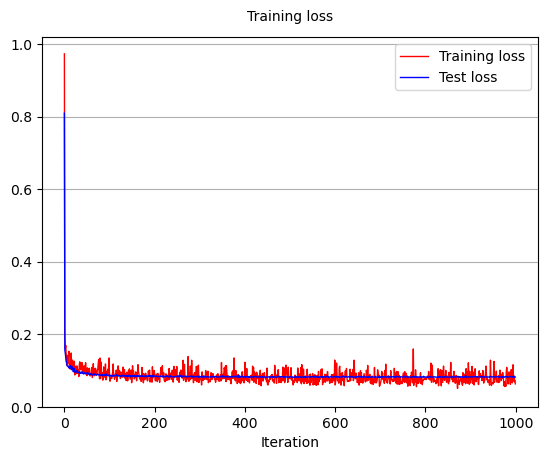

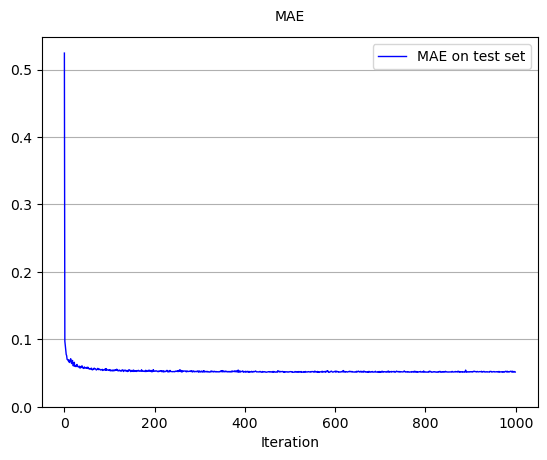

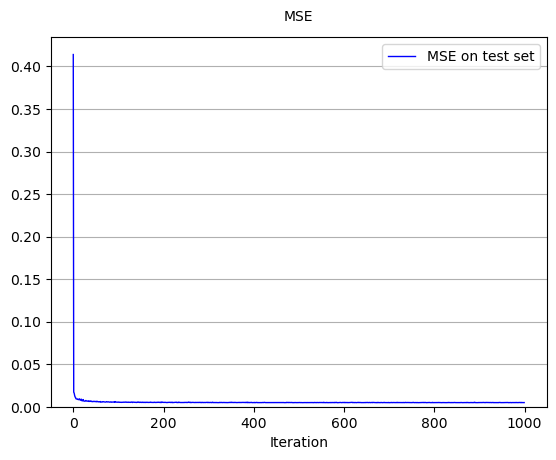

In [7]:
rng = np.random.RandomState(seed=111111)
network = Seven_layer_network(rng=rng,
                               D_in=48,
                               D_hid_1=192,
                               D_hid_2=192,
                               D_hid_3=240,
                               D_hid_4=192,
                               D_hid_5=192)
print(x_train.shape)

# Start training

training_network(network,
                Magnitude_loss,
                rng,
                x_train,
                y_train,
                x_test,
                y_test,
                batch_size=73,
                learning_rate=3e-4,
                total_iters=1000000,
                iters_per_recon_plot=1000)

(51099, 48)
[iter: 0 ]: Training Loss: 1.0726
[iter: 25000 ]: Training Loss: 0.1105
[iter: 50000 ]: Training Loss: 0.0903
[iter: 75000 ]: Training Loss: 0.1228
[iter: 100000 ]: Training Loss: 0.0915
[iter: 125000 ]: Training Loss: 0.0991
[iter: 150000 ]: Training Loss: 0.0830
[iter: 175000 ]: Training Loss: 0.0778
[iter: 200000 ]: Training Loss: 0.0935
[iter: 225000 ]: Training Loss: 0.0975
[iter: 250000 ]: Training Loss: 0.0853
[iter: 275000 ]: Training Loss: 0.0868
[iter: 300000 ]: Training Loss: 0.0864
[iter: 325000 ]: Training Loss: 0.1080
[iter: 350000 ]: Training Loss: 0.0948
[iter: 375000 ]: Training Loss: 0.1001
[iter: 400000 ]: Training Loss: 0.1282
[iter: 425000 ]: Training Loss: 0.0721
[iter: 450000 ]: Training Loss: 0.0810
[iter: 475000 ]: Training Loss: 0.0809
[iter: 500000 ]: Training Loss: 0.0857
[iter: 525000 ]: Training Loss: 0.0705
[iter: 550000 ]: Training Loss: 0.1024
[iter: 575000 ]: Training Loss: 0.0852
[iter: 600000 ]: Training Loss: 0.0676
[iter: 625000 ]: Trai

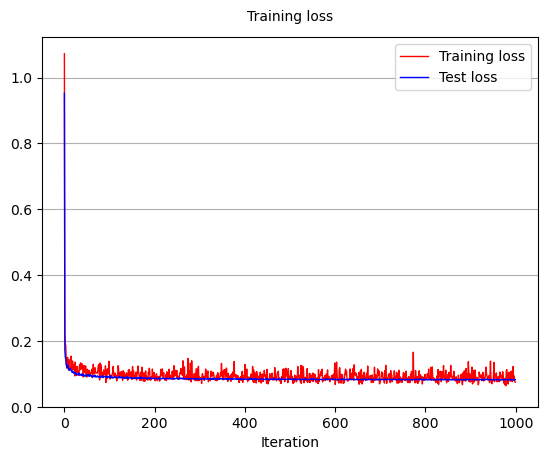

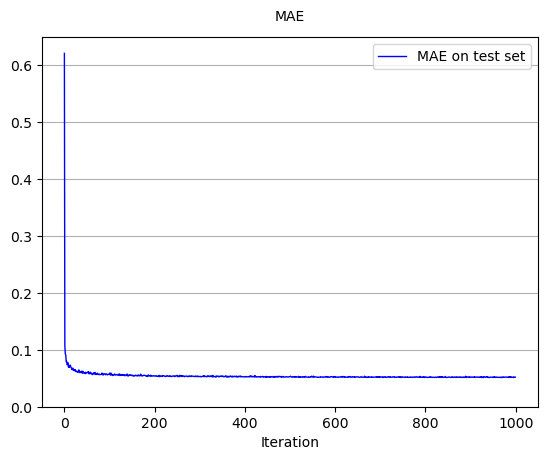

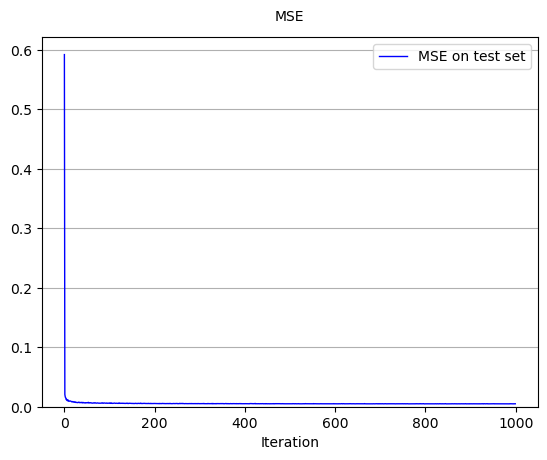

In [18]:
rng = np.random.RandomState(seed=111111)
half_network = Seven_layer_network(rng=rng,
                               D_in=48,
                               D_hid_1=96,
                               D_hid_2=96,
                               D_hid_3=120,
                               D_hid_4=96,
                               D_hid_5=96)
print(x_train.shape)

# Start training

training_network(half_network,
                Magnitude_loss,
                rng,
                x_train,
                y_train,
                x_test,
                y_test,
                batch_size=73,
                learning_rate=3e-4,
                total_iters=1000000,
                iters_per_recon_plot=1000)

(51099, 48)
[iter: 0 ]: Training Loss: 0.9014
[iter: 25000 ]: Training Loss: 0.1699
[iter: 50000 ]: Training Loss: 0.1577
[iter: 75000 ]: Training Loss: 0.1379
[iter: 100000 ]: Training Loss: 0.1060
[iter: 125000 ]: Training Loss: 0.1119
[iter: 150000 ]: Training Loss: 0.1698
[iter: 175000 ]: Training Loss: 0.1240
[iter: 200000 ]: Training Loss: 0.1436
[iter: 225000 ]: Training Loss: 0.1043
[iter: 250000 ]: Training Loss: 0.1130
[iter: 275000 ]: Training Loss: 0.1057
[iter: 300000 ]: Training Loss: 0.1086
[iter: 325000 ]: Training Loss: 0.1213
[iter: 350000 ]: Training Loss: 0.1002
[iter: 375000 ]: Training Loss: 0.0804
[iter: 400000 ]: Training Loss: 0.1093
[iter: 425000 ]: Training Loss: 0.0933
[iter: 450000 ]: Training Loss: 0.1000
[iter: 475000 ]: Training Loss: 0.0940
[iter: 500000 ]: Training Loss: 0.0717
[iter: 525000 ]: Training Loss: 0.0728
[iter: 550000 ]: Training Loss: 0.1029
[iter: 575000 ]: Training Loss: 0.0806
[iter: 600000 ]: Training Loss: 0.0683
[iter: 625000 ]: Trai

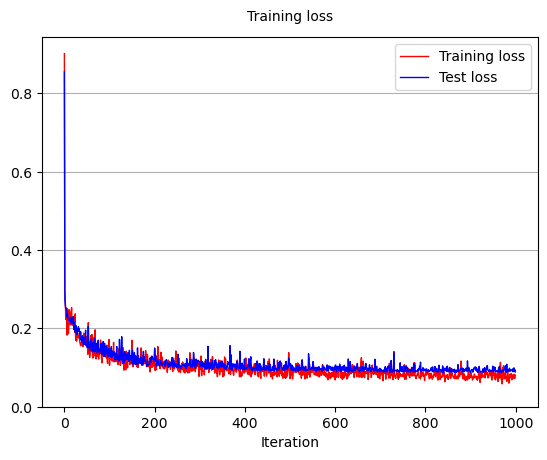

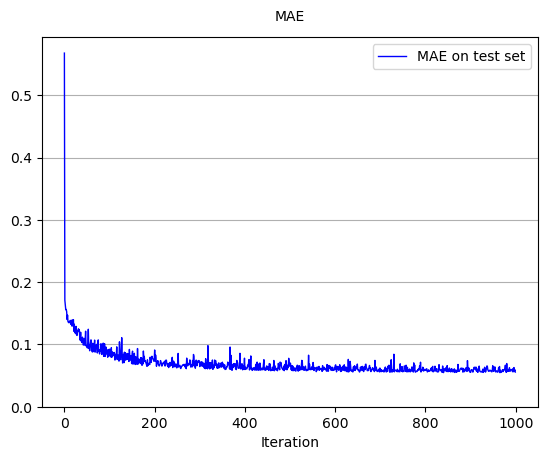

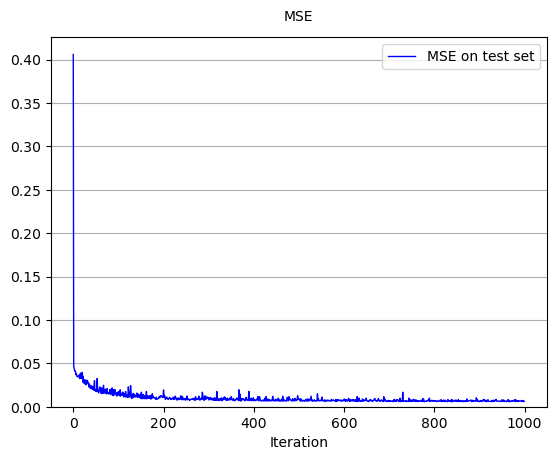

In [27]:
rng = np.random.RandomState(seed=111111)
no_batch_network = Seven_no_batch_layer_network(rng=rng,
                               D_in=48,
                               D_hid_1=192,
                               D_hid_2=192,
                               D_hid_3=240,
                               D_hid_4=192,
                               D_hid_5=192)
print(x_train.shape)

# Start training

training_network(no_batch_network,
                Magnitude_loss,
                rng,
                x_train,
                y_train,
                x_test,
                y_test,
                batch_size=73,
                learning_rate=3e-4,
                total_iters=1000000,
                iters_per_recon_plot=1000)

(51099, 48)
[iter: 0 ]: Training Loss: 1.1339
[iter: 25000 ]: Training Loss: 0.1122
[iter: 50000 ]: Training Loss: 0.1145
[iter: 75000 ]: Training Loss: 0.1308
[iter: 100000 ]: Training Loss: 0.0889
[iter: 125000 ]: Training Loss: 0.1145
[iter: 150000 ]: Training Loss: 0.0903
[iter: 175000 ]: Training Loss: 0.0855
[iter: 200000 ]: Training Loss: 0.0980
[iter: 225000 ]: Training Loss: 0.1019
[iter: 250000 ]: Training Loss: 0.0974
[iter: 275000 ]: Training Loss: 0.0871
[iter: 300000 ]: Training Loss: 0.0931
[iter: 325000 ]: Training Loss: 0.1052
[iter: 350000 ]: Training Loss: 0.0968
[iter: 375000 ]: Training Loss: 0.0900
[iter: 400000 ]: Training Loss: 0.1375
[iter: 425000 ]: Training Loss: 0.0898
[iter: 450000 ]: Training Loss: 0.0850
[iter: 475000 ]: Training Loss: 0.0828
[iter: 500000 ]: Training Loss: 0.0844
[iter: 525000 ]: Training Loss: 0.0848
[iter: 550000 ]: Training Loss: 0.1150
[iter: 575000 ]: Training Loss: 0.0812
[iter: 600000 ]: Training Loss: 0.0691
[iter: 625000 ]: Trai

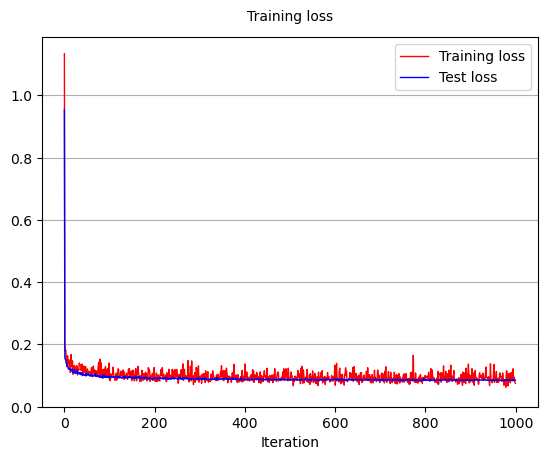

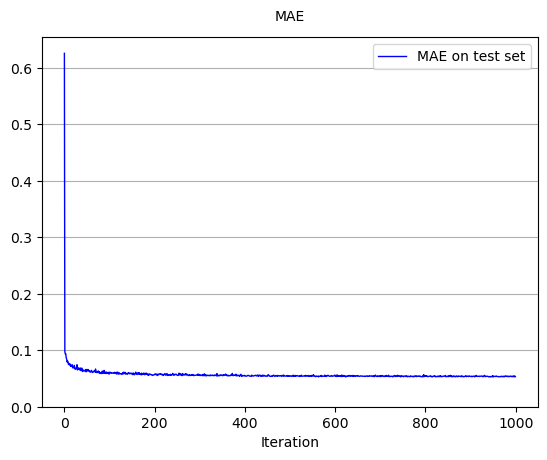

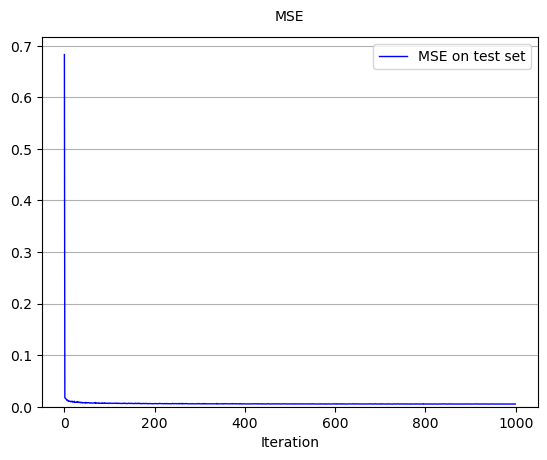

In [28]:
rng = np.random.RandomState(seed=111111)
five_network = Five_layer_network(rng=rng,
                               D_in=48,
                               D_hid_1=192,
                               D_hid_2=240,
                               D_hid_3=192)
print(x_train.shape)

# Start training

training_network(five_network,
                Magnitude_loss,
                rng,
                x_train,
                y_train,
                x_test,
                y_test,
                batch_size=73,
                learning_rate=3e-4,
                total_iters=1000000,
                iters_per_recon_plot=1000)

In [29]:
def calculate_magnitude(x1, x2, y1, y2):
    x = abs(x1 - x2)
    y = abs(y1 - y2)
    return ((x ** 2) + (y ** 2)) ** 0.5

In [58]:
network.eval()
half_network.eval()
five_network.eval()

Five_layer_network(
  (layer_1): Linear(in_features=49, out_features=192, bias=True)
  (bn1): BatchNorm1d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer_2): Linear(in_features=193, out_features=240, bias=True)
  (bn2): BatchNorm1d(240, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer_3): Linear(in_features=241, out_features=192, bias=True)
  (bn3): BatchNorm1d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer_4): Linear(in_features=193, out_features=2, bias=True)
)

In [38]:
def evaluate_metrics(pred_array, real):
    total_difference = 0
    MSE = torch.mean(torch.square(torch.tensor(pred_array) - torch.tensor(real)))
    MAE = torch.mean(abs(torch.tensor(real) - torch.tensor(pred_array)))
    for i in range(real.shape[0]):
        difference = calculate_magnitude(real[i][0], pred_array[i][0], real[i][1], pred_array[i][1])
        total_difference += difference
    print(f"Mean scaled Euclidean distance is {total_difference / pred_array.shape[0]}")
    print(f"MSE is {MSE}")
    print(f"MAE is {MAE}")

In [55]:
pred = network.forward_pass(x_train)
with torch.no_grad():
    pred_array = pred.numpy()
total_difference = 0
max = 0.0
min = 1.0
MSE = torch.mean(torch.square(pred - torch.tensor(y_train)))
MAE = torch.mean(abs(torch.tensor(y_train) - torch.tensor(pred_array)))
for i in range(pred_array.shape[0]):
    difference = calculate_magnitude(y_train[i][0], pred_array[i][0], y_train[i][1], pred_array[i][1])
    total_difference += difference
    if(difference > max):
        max = difference
    if(difference < min):
        min = difference
print(f"Average difference is {total_difference / pred_array.shape[0]}")
print(f"Max error is {max}")
print(f"Min error is {min}")
print(f"MSE is {MSE}")
print(f"MAE is {MAE}")

Average difference is 0.10824176876639577
Max error is 0.7135289383043522
Min error is 0.0004654947137614878
MSE is 0.008201641315506889
MAE is 0.0688444613934049


In [56]:
pred = network.forward_pass(x_test)
with torch.no_grad():
    pred_array = pred.numpy()

print("7 layer with batch:")
evaluate_metrics(pred_array, y_test)

pred = half_network.forward_pass(x_test)
with torch.no_grad():
    pred_array = pred.numpy()

print("7 layer with half neurons:")
evaluate_metrics(pred_array, y_test)

pred = no_batch_network.forward_pass(x_test)
with torch.no_grad():
    pred_array = pred.numpy()

print("7 layer without batch:")
evaluate_metrics(pred_array, y_test)

pred = five_network.forward_pass(x_test)
with torch.no_grad():
    pred_array = pred.numpy()

print("5 layer with batch:")
evaluate_metrics(pred_array, y_test)

7 layer with batch:
Mean scaled Euclidean distance is 0.11937906785974794
MSE is 0.010026312637262677
MAE is 0.07580232959811782
7 layer with half neurons:
Mean scaled Euclidean distance is 0.13888872738980929
MSE is 0.014631656839740438
MAE is 0.08464884653875591
7 layer without batch:
Mean scaled Euclidean distance is 0.09006982849781152
MSE is 0.006217437245176556
MAE is 0.056451413218346104
5 layer with batch:
Mean scaled Euclidean distance is 0.15422458008592896
MSE is 0.016238402877651076
MAE is 0.0972362474028636


In [59]:
import pickle

pickle.dump(network, open('trained model.sav', 'wb'))